## Resultados se muestran al final  
## Se propone Evaluar HHL para sumar  

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

#### Se Carga la cuenta para poder realizar las simulaciones
IBMQ.load_account()
###



In [2]:
%matplotlib inline
# Librerías estandar de Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *

#Librería para optimizar el circuito que se diseñe
from qiskit.compiler import transpile, assemble

#Librerias para el trabajo en el dispositivo real
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ

#Librerias para la visualización por medio de la esfera de Bloch y de histogramas
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city

## Librerías para la visualización de Vectores y matrices
###Display usando markdown
import numpy as np
from IPython.display import display, Markdown, Latex
from array_to_latex import to_ltx
###Otros Display
from herramientas.tools import vector2latex
from herramientas.learn_quantum import format_state_vector
from herramientas.learn_quantum import print_short_state_vector
from herramientas.tools import unitary2latex



In [3]:
from herramientas.tools import unitary2latex2 #Funcion creada para poder visualizar la parte imaginaria



In [4]:
## Se configura la forma de visualizar los vectores con el uso latex y markdown
latex_formatter = get_ipython().display_formatter.formatters["text/latex"]
latex_formatter.for_type(np.ndarray, lambda m: to_ltx(m, print_out=False))



In [10]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
    

In [8]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit



In [ ]:
#ingresamos el numero 5: 101
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(2)
qc.barrier()



In [ ]:
qft(qc,3)
qc.draw('mpl')



In [7]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates



In [ ]:
qc2 = QuantumCircuit(3,3)
qc2 = inverse_qft(qc2,3)
#qc2.measure_all()
qc2.draw('mpl')



In [ ]:
#Se unen los dos circuitos anteriores para comprobar el funcionamiento
qc3=qc
qc3.barrier()
qc3=qc3+qc2



In [ ]:
%config InlineBackend.figure_format = 'svg' # Makes the images fit
qc3.draw('mpl')



In [ ]:
qc3.measure(0,0)
qc3.measure(1,1)
qc3.measure(2,2)
# qc3.measure(3,3)



In [ ]:
# Elejimos el simulador de Vector de Estados
backend = Aer.get_backend('statevector_simulator')

# Corremos la simulación
job_sim = execute(qc3, backend)

# Obtenemos los resultados
sim_result = job_sim.result()

# Extraemos el vector final de resultados
h=sim_result.get_statevector()



In [ ]:
print(h)
# Realizamos la conversión del vector resultante
vector2latex(h, pretext="\\text{Resultado} = ", precision=2)



In [ ]:
# Run the experimient 1024 times and get stats
counts = execute(qc3,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)



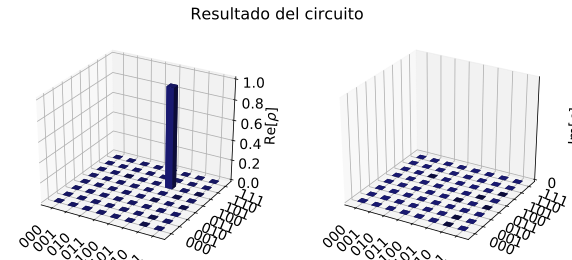

In [95]:
# Se realiza la gráfica de los estados resultantes
plot_state_city(h,0.5)
plot_state_city(h, figsize=(10,4),color=['midnightblue', 'midnightblue'],
     title="Resultado del circuito")



# Se verifica el funcionamiento tanto de la transformada de fourier como de su inversa, ya que se obtiene b101, el numero 5 en binario


## Ahora se procede a realizar el sumador propuesto por Cherkas y Chilivikin:

![imagen1](Cherkas_Adder.png)

#### R1 y R2 corresponden a rotaciones controladas y el subindice indica el coeficiente de la rotación:

![imagen2](rotacion.png)

Para el caso se sumaran los números 1 y 2, por lo cual las entradas del algoritmo serán las siguientes:  
* $|a_1\rangle = 1$  
* $|a_2\rangle = 0$  
* $|b_1\rangle = 0$  
* $|b_2\rangle = 1$  


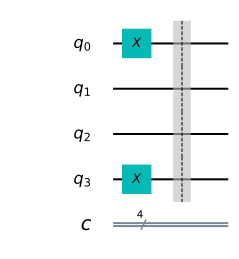

In [17]:
qc = QuantumCircuit(4,4)
qc.x(0)
qc.x(3)
qc.barrier()
qc.draw('mpl')



In [18]:
qft(qc,2)



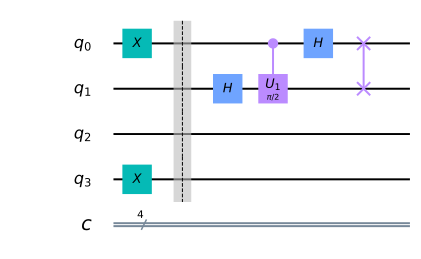

In [19]:
qc.draw('mpl')



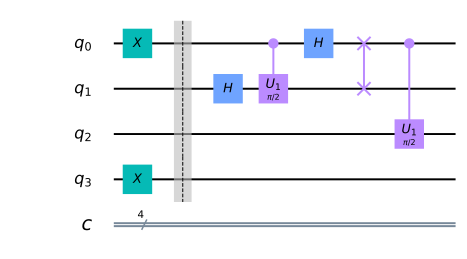

In [20]:
qc.cu1(np.pi/2, 0, 2) # CROT from qubit 1 to qubit 2
qc.draw('mpl')



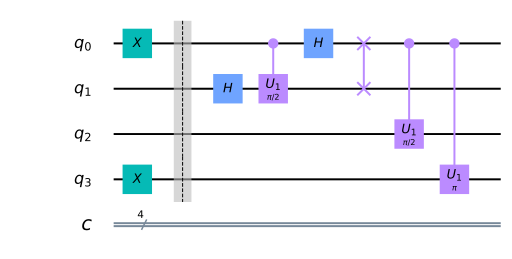

In [21]:
qc.cu1(np.pi, 0, 3) # CROT from qubit 1 to qubit 2
qc.draw('mpl')



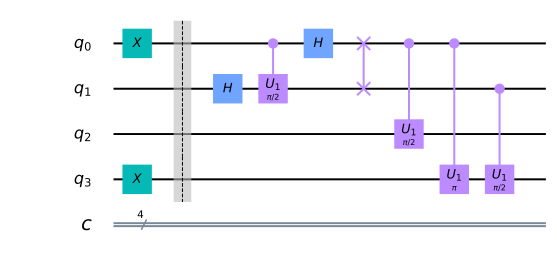

In [22]:
qc.cu1(np.pi/2, 1, 3) # CROT from qubit 1 to qubit 2
qc.draw('mpl')



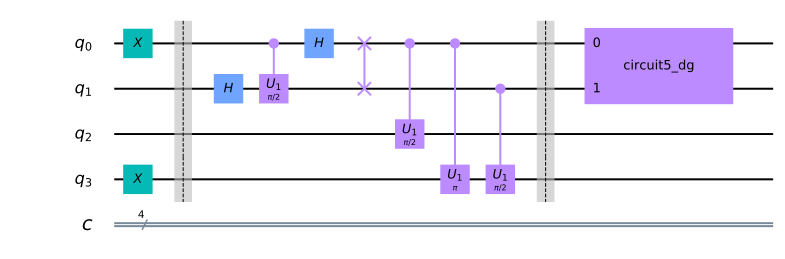

In [23]:
qc.barrier()
inverse_qft(qc,2)
qc.draw('mpl')



In [25]:
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)



{'1011': 519, '1010': 263, '1000': 242}


## A continuacion de verifican las matrices unitarias de las compuertas de rotación

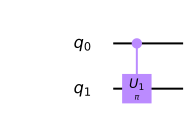

In [104]:
qca=QuantumCircuit(2)
qca.cu1(np.pi, 0, 1)
qca.draw('mpl')



In [105]:
from herramientas.tools import unitary2latex

#Se calcula la matriz unitaria
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qca,unitary_backend).result().get_unitary()

# Se imprime la matriz unitaria que representa el circuito
unitary2latex(unitary, pretext="\\text{Circuit = }\n", precision=2)
print(unitary)




$$ \text{Circuit = }
\begin{bmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	0 & 0 & 0 & -1  \\
\end{bmatrix} $$

[[ 1.+0.0000000e+00j  0.+0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j  1.+0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j  0.+0.0000000e+00j  1.+0.0000000e+00j
   0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j  0.+0.0000000e+00j  0.+0.0000000e+00j
  -1.+1.2246468e-16j]]


## Coincide con la referenciada en el artículo

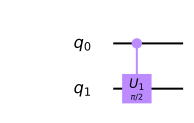

In [106]:
qcn=QuantumCircuit(2)
qcn.cu1(np.pi/2, 0, 1)
qcn.draw('mpl')



In [107]:
#Se calcula la matriz unitaria
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qcn,unitary_backend).result().get_unitary()

# Se imprime la matriz unitaria que representa el circuito
unitary2latex(unitary, pretext="\\text{Circuit = }\n", precision=2)
print(unitary)



E:\PROBABILIDAD EJERCICIO\INVESTIGACION\herramientas\tools.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  out_latex += str(int(np.round(amplitude))) + " & "



$$ \text{Circuit = }
\begin{bmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	0 & 0 & 0 & 0  \\
\end{bmatrix} $$

[[1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+1.j]]


## Coincide con la referenciada en el artículo, ya que  
$ 6.123234e-17+1.j= 0+j$

# Se procede a verificar las matrices de las $QFT$ y $QFT^-1$

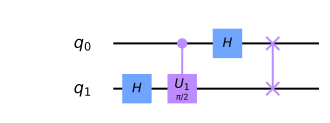

In [172]:
## Se crea el circuito para verificar la matriz que se crea con la tranformada de fourier

C_qft=QuantumCircuit(2)
qft(C_qft, 2)
C_qft.draw('mpl')



In [171]:
#Se calcula la matriz unitaria
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(C_qft,unitary_backend).result().get_unitary()

# Se imprime la matriz unitaria que representa el circuito
unitary2latex2(unitary, pretext="\\text{C_qft = }\n", precision=2)
print(unitary)



c:\users\alejo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.



$$ \text{C_qft = }
\begin{bmatrix}
	0.50 & 0.50 & 0.50 & 0.50  \\
	0.50 & 0+(0.5 j ) & -0.50 & 0+(-0.5 j )  \\
	0.50 & -0.50 & 0.50 & -0.50  \\
	0.50 & 0+(-0.5 j ) & -0.50 & 0+(0.5 j )  \\
\end{bmatrix} $$

[[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01-6.1232340e-17j
   5.00000000e-01-6.1232340e-17j  5.00000000e-01-1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j  9.18485099e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -1.53080850e-16-5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-6.1232340e-17j -5.00000000e-01+1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j  1.53080850e-16+5.0000000e-01j]]


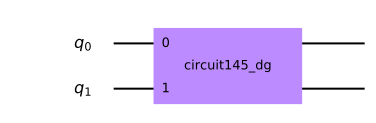

In [192]:
I_C_qft2=QuantumCircuit(2)
inverse_qft(I_C_qft2, 2)
I_C_qft2.draw('mpl')



In [117]:
#Se calcula la matriz unitaria
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(I_C_qft2,unitary_backend).result().get_unitary()

# Se imprime la matriz unitaria que representa el circuito
unitary2latex2(unitary, pretext="\\text{C_qft2 = }\n", precision=2)
print(unitary)



c:\users\alejo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.



$$ \text{C_qft2 = }
\begin{bmatrix}
	0.50 & 0.50 & 0.50 & 0.50  \\
	0.50 & 0+(-0.5 j ) & -0.50 & 0+(0.5 j )  \\
	0.50 & -0.50 & 0.50 & -0.50  \\
	0.50 & 0+(0.5 j ) & -0.50 & 0+(-0.5 j )  \\
\end{bmatrix} $$

[[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01-6.1232340e-17j
   5.00000000e-01-6.1232340e-17j  5.00000000e-01-1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j -3.06161700e-17-5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j  9.18485099e-17+5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-6.1232340e-17j -5.00000000e-01+1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j  3.06161700e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -9.18485099e-17-5.0000000e-01j]]


In [114]:
def unitary2latex3(unitary, precision=5, pretext="", display_output=True):
    out_latex = "\n$$ " + pretext
    out_latex += "\\begin{bmatrix}\n"
    for row in unitary:
        out_latex += "\t" # This makes the latex source more readable
        for amplitude in row:
            amplitude = np.real_if_close(amplitude)
            amp_mod = np.mod(np.real(amplitude), 1)
            if (np.isclose(amp_mod, 0) or np.isclose(amp_mod, 1)) and type(amplitude) == np.ndarray:
                out_latex += str(int(np.round(amplitude))) +"+" +"("+str(np.round(np.imag(amplitude),1))+" j "+")"+" & "
            else:
                out_latex += '{:.{}f}'.format(amplitude, precision) + " & "
        out_latex = out_latex[:-2] # remove trailing ampersands
        out_latex += " \\\\\n"
    out_latex += "\end{bmatrix} $$"
    if display_output:
        display(Markdown(out_latex))
    else:
        return out_latex
    
    

In [153]:
unitary2latex2(unitary, pretext="\\text{Circuit = }\n", precision=2)
print(unitary)



c:\users\alejo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.



$$ \text{Circuit = }
\begin{bmatrix}
	0.50 & 0.50 & 0.50 & 0.50  \\
	0.50 & 0+(-0.5 j ) & -0.50 & 0+(0.5 j )  \\
	0.50 & -0.50 & 0.50 & -0.50  \\
	0.50 & 0+(0.5 j ) & -0.50 & 0+(-0.5 j )  \\
\end{bmatrix} $$

[[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01-6.1232340e-17j
   5.00000000e-01-6.1232340e-17j  5.00000000e-01-1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j -3.06161700e-17-5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j  9.18485099e-17+5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-6.1232340e-17j -5.00000000e-01+1.2246468e-16j]
 [ 5.00000000e-01+0.0000000e+00j  3.06161700e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -9.18485099e-17-5.0000000e-01j]]


In [ ]:
unitary



## Modificación al propuesto por Cherkas

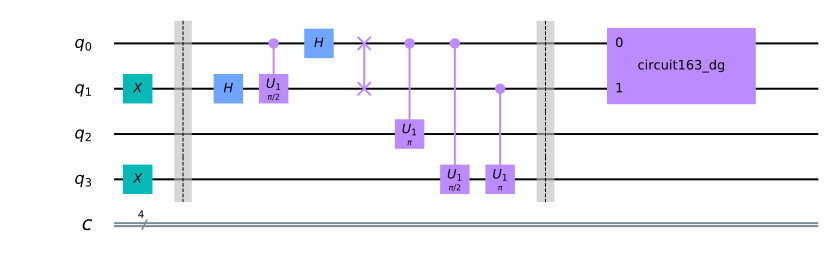

In [206]:
qc = QuantumCircuit(4,4)

qc.x(1)

qc.x(3)

qc.barrier()

qc.draw('mpl')

qft(qc,2)

qc.draw('mpl')

qc.cu1(np.pi, 0, 2) # CROT from qubit 1 to qubit 2

qc.draw('mpl')

qc.cu1(np.pi/2, 0, 3) # CROT from qubit 1 to qubit 2

qc.draw('mpl')

qc.cu1(np.pi, 1, 3) # CROT from qubit 1 to qubit 2

qc.draw('mpl')

qc.barrier()

inverse_qft(qc,2)

qc.draw('mpl')



In [207]:
# Elejimos el simulador de Vector de Estados
backend = Aer.get_backend('statevector_simulator')
# Corremos la simulación
job_sim = execute(qc, backend)
# Obtenemos los resultados
sim_result = job_sim.result()
# Extraemos el vector final de resultados
h=sim_result.get_statevector()
print(h)



[ 0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  6.123234e-17+6.123234e-17j  0.000000e+00+6.123234e-17j
 -6.123234e-17+6.123234e-17j  1.000000e+00-3.061617e-16j
  0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j]


In [208]:
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)



{'1011': 1024}


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


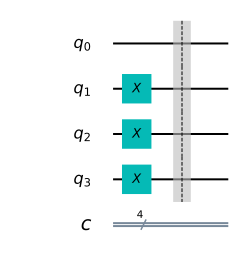

In [164]:
qcaux=QuantumCircuit(4,4)
qcaux.x(1)
qcaux.x(2)
qcaux.x(3)
qcaux.barrier()

# Elejimos el simulador de Vector de Estados
backend = Aer.get_backend('statevector_simulator')
# Corremos la simulación
job_sim = execute(qcaux, backend)
# Obtenemos los resultados
sim_result = job_sim.result()
# Extraemos el vector final de resultados
h=sim_result.get_statevector()
print(h)

qcaux.draw('mpl')



In [165]:
qcaux.measure(0,0)
qcaux.measure(1,1)
qcaux.measure(2,2)
qcaux.measure(3,3)
counts = execute(qcaux,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)



{'1110': 1024}


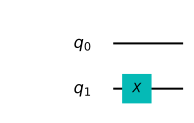

In [166]:
qccc=QuantumCircuit(2)
qccc.x(1)
qccc.draw('mpl')



In [151]:
# Elejimos el simulador de Vector de Estados
backend = Aer.get_backend('statevector_simulator')

# Corremos la simulación
job_sim = execute(qccc, backend)

# Obtenemos los resultados
sim_result = job_sim.result()

# Extraemos el vector final de resultados
h=sim_result.get_statevector()



In [152]:
h



array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

In [193]:
#Se calcula la matriz unitaria
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(I_C_qft2,unitary_backend).result().get_unitary()



In [194]:
v=np.array([[1],[complex(0,-1)],[-1],[complex(0,1)]])



In [195]:
v



array([[ 1.+0.j],
       [ 0.-1.j],
       [-1.+0.j],
       [ 0.+1.j]])

In [197]:
y=unitary@(0.5*v)
y



array([[ 3.061617e-17+3.06161700e-17j],
       [ 0.000000e+00+3.06161700e-17j],
       [-3.061617e-17+3.06161700e-17j],
       [ 1.000000e+00-9.18485099e-17j]])

In [220]:
provider = IBMQ.load_account()

from qiskit.providers.ibmq import least_busy



In [222]:
provider = IBMQ.get_provider(hub='ibm-q')
device=provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend= device, shots=1024)
print(job.job_id())
job_monitor(job)



5eacfec15b4fb90012f7fadc


Job Status: job has successfully run


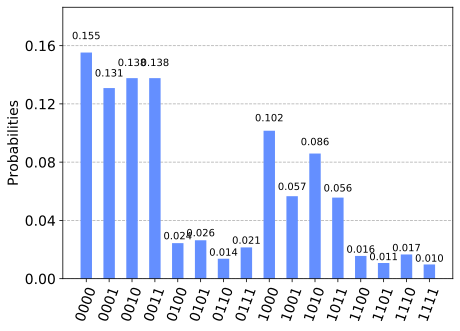

In [225]:
job_monitor(job)
results=job.result()
plot_histogram(results.get_counts(qc))



In [226]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)



{'1011': 1024}


## Tampoco se ve una buena probabilidad

## Se propone Evaluar HHL para sumar